In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Get CSV data and convert to dataframe
df = pd.read_csv("course-data.csv", sep="\t")

df

,Name,Level,School Year,Year,Term,Type,Department,Prof-gender,Grade,Fun
0,Newtonian Physics,100,Freshman,2018,Fall,"Lecture, Lab",PHYS,F,A-,3.0
1,The Atlantic World,100,Freshman,2018,Fall,"Lecture, Discussion",HIST,M,B+,3.0
2,Anti-Heroes,FYSE-Seminar,Freshman,2018,Fall,Discussion,ENAM,M,A-,3.0
3,Calculus II,100,Freshman,2018,Fall,Lecture,MATH,F,A-,2.0
4,Privledge and Poverty,1000,Freshman,2019,Winter,Discussion,RELI,M,A,2.0
5,The 20th Century British Novel,200,Freshman,2019,Spring,Lecture,ENAM,M,A-,4.0
6,Early Modern Europe,200,Freshman,2019,Spring,"Lecture, Discussion",HIST,M,A,5.0
7,"Waves, Fluids, Optics, and Thermodynamics",100,Freshman,2019,Spring,"Lecture, Lab",PHYS,F,B+,2.0
8,Intro to Microeconomics,100,Freshman,2019,Spring,Lecture,ECON,F,B+,1.0
9,Russian Literature,200,Sophomore,2019,Fall,Discussion,RUSS,M,A,4.0


In [16]:
""" Level """

# Processing Data
counts = df.loc[:, "Level"].value_counts()
levels = counts.index
levels

Int64Index([200, 100, 300, 400, 1000, 700, -1], dtype='int64')

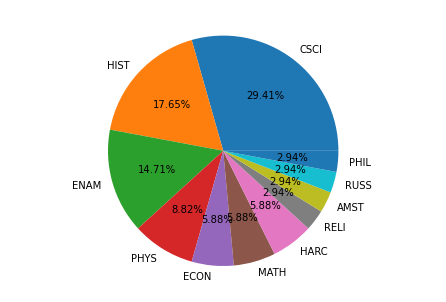

In [10]:
""" Departments """

# Processing Data
counts = df.loc[:, "Department"].value_counts()
departments = counts.index

# Displaying Data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(counts,labels = departments, autopct='%1.2f%%')
plt.show()

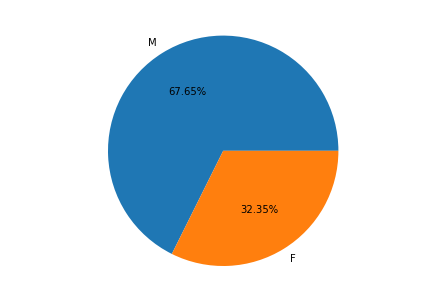

In [14]:
""" Gender """

# Processing Data
counts = df.loc[:, "Prof-gender"].value_counts()
labels = counts.index

# Displaying Data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(counts,labels = labels, autopct='%1.2f%%')
plt.show()

In [5]:
""" Grades """

# Processing Data

' Grades '